# Task 1: Theory Questions Answer in 2–4 sentences:

- What is the core assumption of Naive Bayes?
- Differentiate between GaussianNB, MultinomialNB, and BernoulliNB.
- Why is Naive Bayes considered suitable for high-dimensional data?

# Answer 1

-  The core assumption of Naive Bayes is that all features are conditionally independent of each other given the class label. This means the presence (or value) of one feature does not affect the presence (or value) of another, simplifying computation.

# Answer 2

- GaussianNB assumes that features follow a normal (Gaussian) distribution and is suitable for continuous data.
- MultinomialNB is used for discrete count data (e.g., word counts in text classification).
- BernoulliNB is ideal for binary/boolean features, where each feature is either 0 or 1 (e.g., word presence/absence).

# Answer 3

- Its simplicity and efficiency stem from the conditional independence assumption, which avoids the curse of dimensionality. This makes it highly effective for tasks like spam detection or text categorization, where feature vectors are large.


# Task 2: Spam Detection using MultinomialNB
- Load a text dataset (e.g., SMS Spam Collection or any public text dataset).
- Preprocess using CountVectorizer or TfidfVectorizer.
- Train a MultinomialNB classifier.
- Evaluate:
 Accuracy,
 Precision,
 Recall,
 Confusion Matrix

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import seaborn as sns

In [15]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1','v2']]

df.columns = ['label','message']
df['label'] = df['label'].map({'ham':0,'spam':1})

df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
vectorizer = TfidfVectorizer(stop_words='english')
# vectorizer = CountVectorizer() we can use that also
X = vectorizer.fit_transform(df['message'])

# y has label column in which spam:1 and ham:0
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred[:10])
y_test.head(10)

[0 0 0 0 1 0 0 0 0 0]


3245    0
944     0
1044    1
2484    0
812     1
2973    0
2991    0
2942    0
230     0
1181    0
Name: label, dtype: int64

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.968609865470852
Precision: 1.0
Recall: 0.7666666666666667
Confusion Matrix:
 [[965   0]
 [ 35 115]]


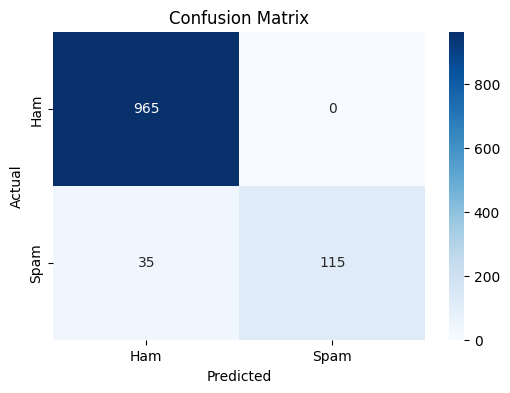

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()